## Sentiment analysis

In [1]:
import os

In [2]:
os.path.dirname(os.getcwd())

'c:\\Users\\ASUS VIVO\\Desktop\\_week_1\\_week_1'

In [3]:
from load import load_data
from descriptive import length
from descriptive import groupby
from descriptive import change
from plot import plot
from plot import sentiment
from textblob import TextBlob
import pandas as pd


In [4]:
df=load_data(r'C:\Users\ASUS VIVO\Desktop\data\raw_analyst_ratings.csv').drop('Unnamed: 0',axis=1)

## Descriptive Statistics:
  Obtain basic statistics for textual lengths (like headline length).
Count the number of articles per publisher to identify which publishers are most active.
Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.



In [12]:
length(dataframe=df,column='headline') 

1407328

In [51]:
groupby(data_frame=df,group_column='publisher',count_column='headline')

,headline
publisher,
47ertrends,18
AARP,7
ABNNewswire,13
Aakin,5
Aaron Jackson.Ed,16
...,...
vic@forextraininggroup.com,1
vishwanath@benzinga.com,1830
vivek.proactive@gmail.com,120


In [18]:
df['date']=pd.to_datetime(df['date'],format='mixed',utc=True)

In [32]:
change(data_frame=df,date='date')

0          True
1          True
2          True
3          True
4          True
           ... 
1407323    True
1407324    True
1407325    True
1407326    True
1407327    True
Name: date, Length: 1407328, dtype: bool

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype              
---  ------     --------------    -----              
 0   headline   1407328 non-null  object             
 1   url        1407328 non-null  object             
 2   publisher  1407328 non-null  object             
 3   date       1407328 non-null  datetime64[ns, UTC]
 4   stock      1407328 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 53.7+ MB


Text(0, 0.5, 'news')

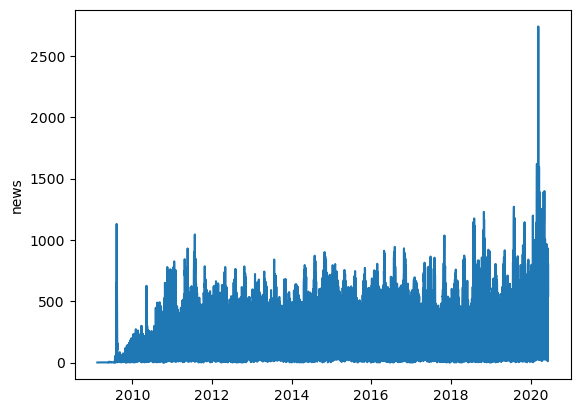

In [39]:
plt.plot(df.groupby(df['date'].dt.date)['publisher'].count())
plt.ylabel('news')

## Text Analysis(Sentiment analysis & Topic Modeling):
Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.
Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).


In [8]:


# Function to analyze sentiment
def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each headline
df['sentiment'] = df['headline'].apply(analyze_sentiment)



In [9]:
df

,headline,url,publisher,date,stock,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Neutral
...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,Positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,Positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,Neutral


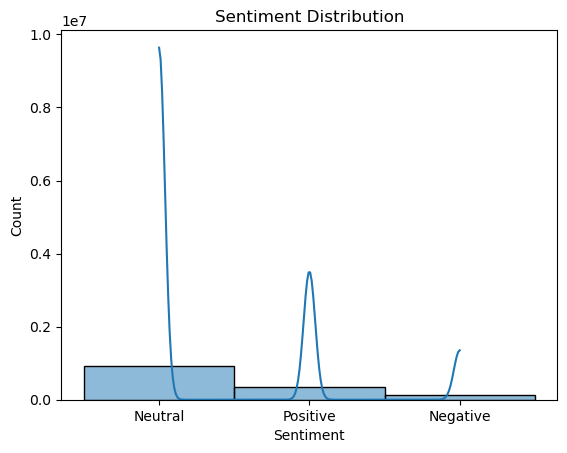

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
def sentiment(dataframe,column):
   if column in dataframe.columns:
        sns.histplot(data=dataframe, x=column, kde=True)
        plt.title('Sentiment Distribution')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.show()
    
   else: 
     print(f"Column '{column}' does not exist in the DataFrame.")
sentiment(df,'sentiment')

In [16]:
sentiment(dataframe=df,column=sentiment)

Column '<function sentiment at 0x00000191003AEE80>' does not exist in the DataFrame.


## Time Series Analysis:
How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.


Text(0, 0.5, 'publisher')

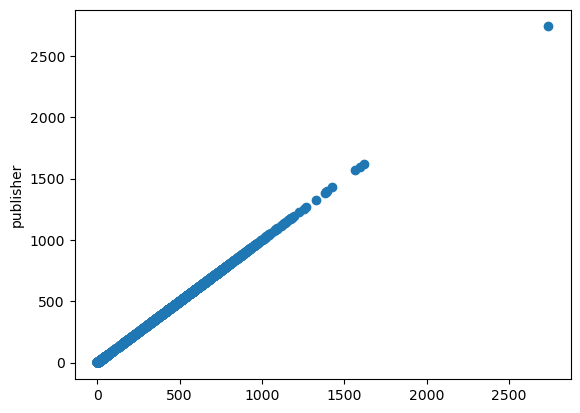

In [22]:
plt.scatter(df.groupby(df['date'].dt.date)['publisher'].count(),df.groupby(df['date'].dt.date)['publisher'].count())
plt.ylabel('publisher')